In [ ]:
pip install seaborn

In [ ]:
import sys, pandas as pd, seaborn as sns, matplotlib
print(sys.version)
print(pd.__version__, sns.__version__, matplotlib.__version__)

from pathlib import Path
try:
    from google.colab import drive
    drive.mount('/content/drive')
    ROOT = Path('/content/drive/MyDrive/ID-UT1-iris')
except Exception:
    ROOT = Path.cwd() / 'ID-UT1-iris'

PLOTS_DIR = ROOT / 'results' / 'visualizaciones'
PERF_DIR = ROOT / 'results' / 'perfiles'
REPORT_DIR = ROOT / 'results' / 'reportes'
for d in (PLOTS_DIR, PERF_DIR, REPORT_DIR):
    d.mkdir(parents=True, exist_ok=True)
print('Outputs →', ROOT)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
2.2.2 0.13.2 3.10.0
Mounted at /content/drive
Outputs → /content/drive/MyDrive/ID-UT1-iris


# 2- Investigar el dataset

Objetivo: Analizar las características morfológicas de tres especies de flores de iris (Iris setosa, Iris versicolor e Iris virginica) para identificar patrones y relaciones entre variables que permitan diferenciar las especies.

Variables:

*   Id = Id unico para cada flor
*   SepalLengthCm = Largo sépalo
*   SepalWidthCm = Ancho sépalo
*   PetalLengthCm = Largo pétalo
*   PetalWidthCm = Ancho pétalo
*   Species = Una de las 3 especies de flores posible

Unidades: centímetros para las cuatro variables de medida de las flores.

Tamaño: 150 filas del archivo, 50 para cada especie.

Fuentes: UC Irvine Machine Learning Repository, y Kaggle Iris.

Supuestos: Que una de las especies se diferencie notoriamente de las otras dos, mientras que con las dos parecidas haya alguna diferencia menos obvia.

# 3- Preguntas de negocio
1.	¿Cuál es la longitud promedio de pétalos y sépalos por especie?
Esto permite identificar diferencias promedio entre especies.
2.	¿Existe una relación clara entre el largo y el ancho de pétalos?
Un scatterplot podría mostrar si hay correlación fuerte.
3.	¿Se pueden separar visualmente las especies usando solo dos variables (por ejemplo, petal_length y petal_width)?
Ayuda a evaluar si el dataset es linealmente separable.
4.	¿Qué variable presenta mayor variabilidad dentro de cada especie?
Permite entender qué medida es menos consistente dentro de cada clase.
5.	¿Qué tan equilibrada está la distribución de observaciones por especie?
Sirve para verificar balance de clases antes de modelar.

In [9]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
import pandas as pd
df.shape, df.dtypes, df.isna().sum()
display(df.describe(include='all').T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
desc = df.describe()
corr = df.select_dtypes('number').corr()
print(desc); print(corr)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [12]:
!pip -q install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Iris – Profile', minimal=True)
profile.to_file(f'{REPORT_DIR}/profile_iris.html')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.8 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 205.04it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

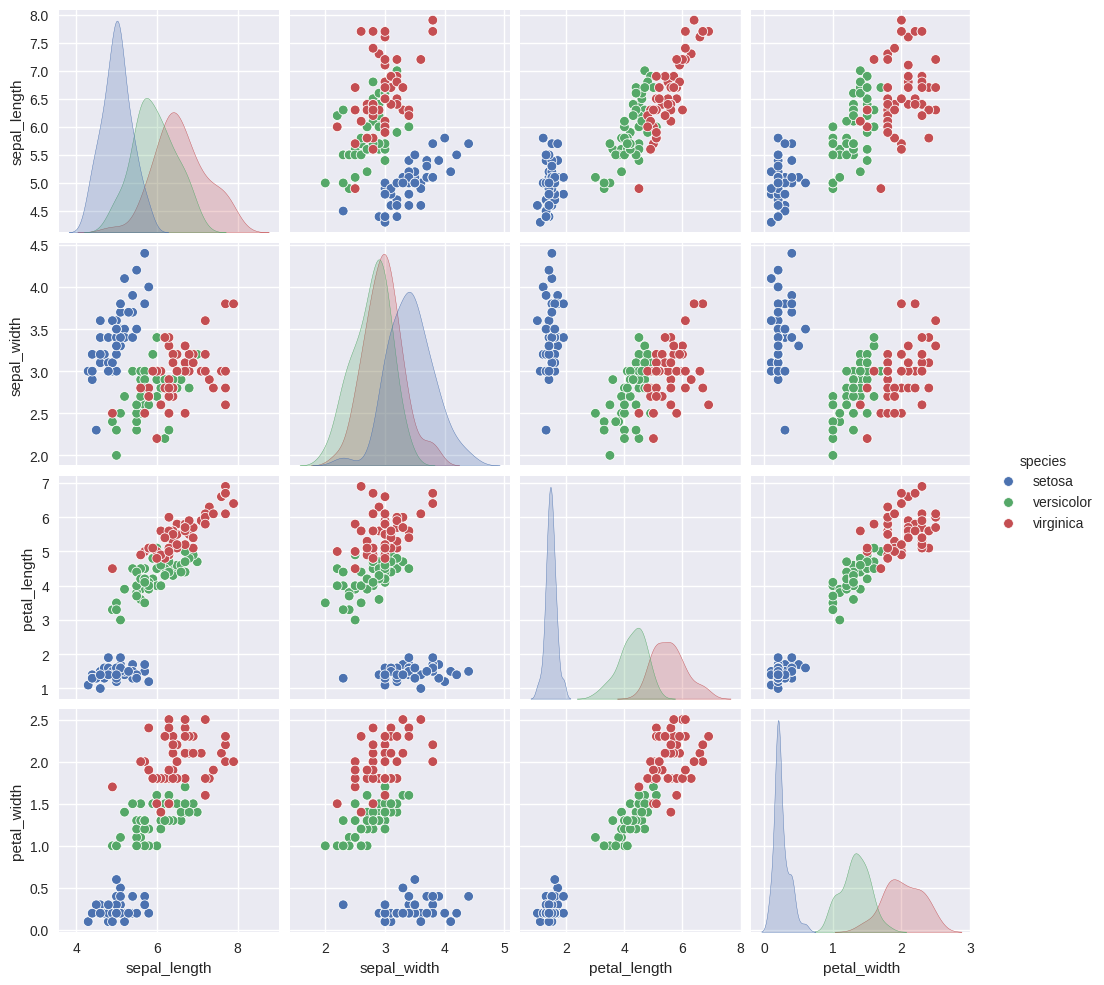

In [13]:
import seaborn as sns, matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# Correlaciones
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'corr.png', dpi=200, bbox_inches='tight')
plt.close()

# Pairplot (puede demorar en Colab)
pair = sns.pairplot(df, hue='species', diag_kind='kde')
pair.savefig(PLOTS_DIR / 'pairplot.png')